<a href="https://colab.research.google.com/github/misbahsy/FourthBrain/blob/main/MisbahSyed_Week0_Regression_assignment_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Exercise shows how to use Google colab to apply regression models.**
**Copy the Colab notebook and data to your google drive before proceeding.**

Step 1: Connect Google drive that stores the data with your Google Colab Notebook

In [49]:
import numpy as np
import numpy.matlib as matlib
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Replace the ID with ID of file you want to access. To get this ID: 

1.   Right-click on the name of the appropriate file in your Google Drive
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary argument of the call to `drive.CreateFile()` as the value associated with the 'id' key. Make sure that this value is a string.



In [50]:
# Replace the ID with ID of file you want to access
# To get this ID, right-click on the name of the appropriate file in your 
downloaded = drive.CreateFile({'id':'155JRHnDIbBw2F2hikBt5Hf3OH2-g4bSo'}) 
downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

Step 2: Read the Data and verify its format!

In [51]:
import pandas as pd
data = pd.read_csv('time_series_covid_19_confirmed.csv') 
print("The shape of data=",data.shape)
data.head()

The shape of data= (266, 225)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


Step 3: Original data has [266x225] dimensions. Let's use only 50 rows and 100 columns.

In [52]:
rows=50
cols=100
data_new=data.iloc[0:rows,4:cols+4]
print(data_new.shape)

(50, 100)


In [54]:
#view the sub-sectioned data
data_new.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,24,35,35,82,102,120,135,148,152,175,183,195,195,217,226,228,228,232,239,241,242,244,244,247,252,256,257,257,257,257,256,256,256,257,258,258,258,258,258
46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1,2,2,2,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28,41,51,68,73,90,110,122,127,147,173,193,207,236,262,293,310,310,342,407,428,445,474,517,549,579,606,649,675,721,737,772,827,850,865,873,900,915,935,947
48,0,0,0,0,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,6,6,11,15,...,425,503,588,688,858,994,1144,1355,1706,1966,2392,2793,3255,3630,4354,4347,4726,5276,5759,6237,6648,7049,7470,7953,8447,9840,10456,11013,11561,12063,12715,13718,14068,14550,15012,15568,15970,16500,16978,17395
49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,5,5,9,11,11,18,21,21,22,22,22,22,22,22,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,27,27,27


Step 4: Convert the Tablular data to format {X,Y}, where X={Longitude, Latitude, Date}, Y={#infected}

In [8]:
# Finding the date indices
import matplotlib.pyplot as plt
data_row=data_new.sum(axis=0)
print(data_row)
days=range(0,data_row.shape[0])
print(days)
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
print(data_new.shape[0])
print(days_mat.shape)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         5
            ...  
4/26/20    193781
4/27/20    201628
4/28/20    211082
4/29/20    221608
4/30/20    232933
Length: 100, dtype: int64
range(0, 100)
50
(50, 100)


In [9]:
print(days_mat.shape)

(50, 100)


In [10]:
# Let's create data X-{X1,X2,X3}, where X1=lat, X2=long, X3=date, Y=#affected
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new=np.array(data_new)
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1)))

In [11]:
print(np.shape(X))
#Data Preparation is Done!

(5000, 3)


In [12]:
print(np.shape(Y))

(5000, 1)


In [13]:
print(X)

[[ 33.93911   67.709953   0.      ]
 [ 33.93911   67.709953   1.      ]
 [ 33.93911   67.709953   2.      ]
 ...
 [ 46.5107   -63.4168    97.      ]
 [ 46.5107   -63.4168    98.      ]
 [ 46.5107   -63.4168    99.      ]]


In [14]:
print(Y)

[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [27.]
 [27.]
 [27.]]


Step 5: Let's Plot the Data to see the converted Data format!

(5000, 3)


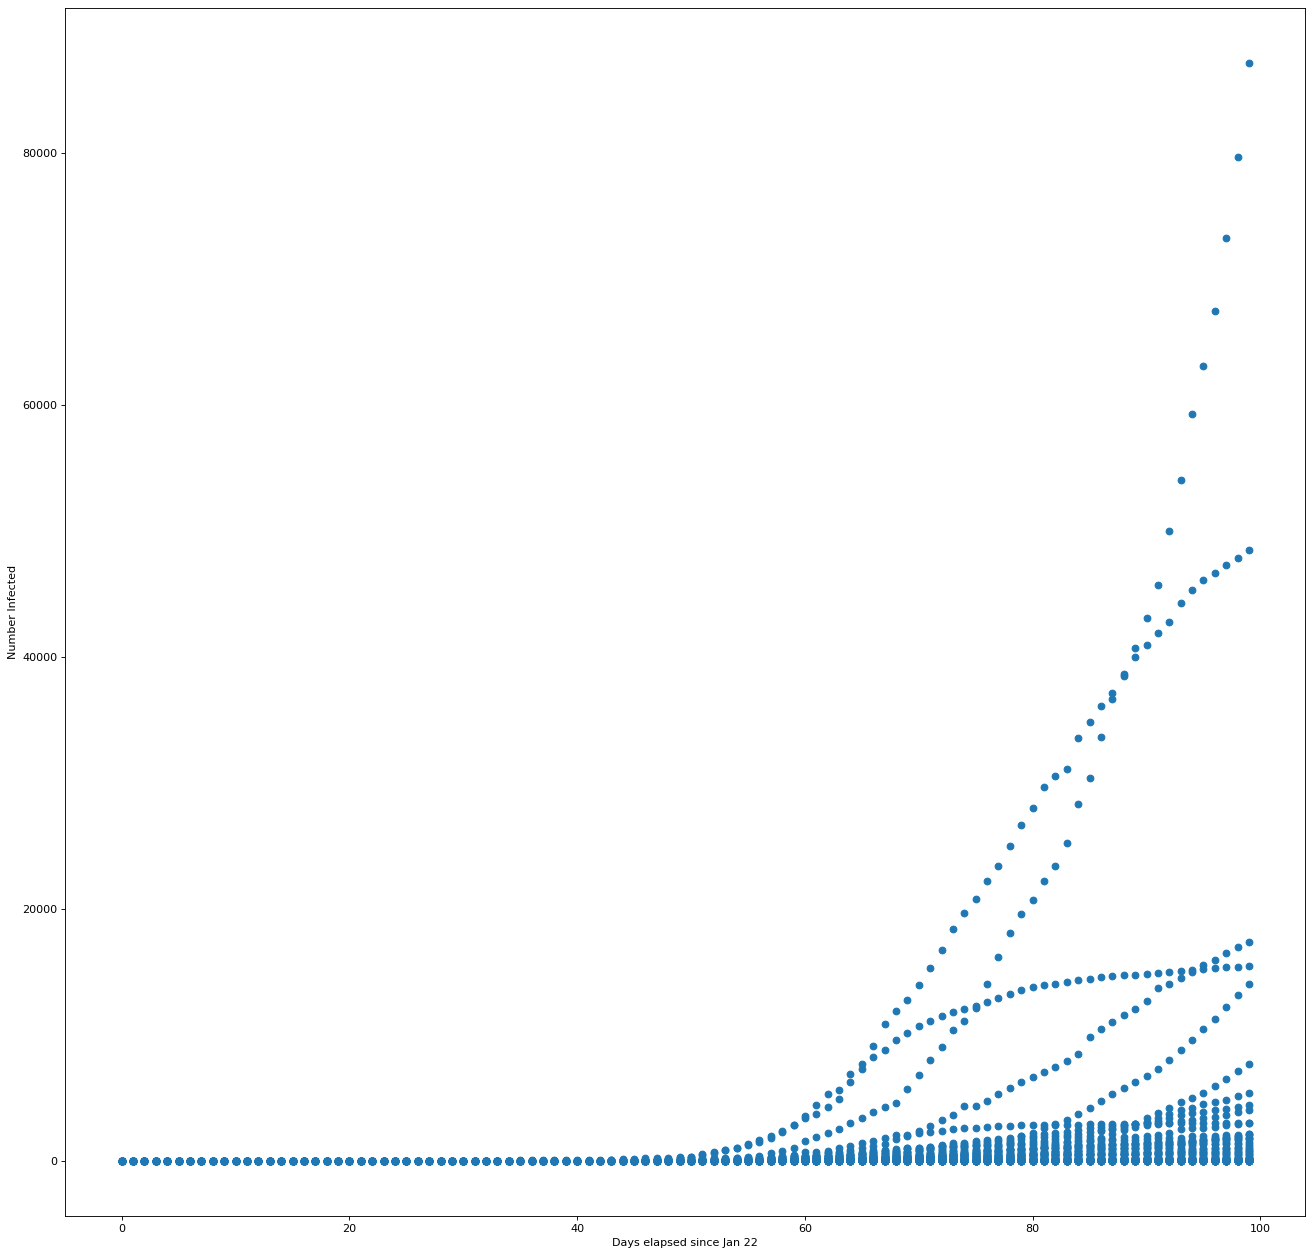

In [15]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
print(np.shape(X))

Step 6: Let's spilt the data to training and test (70% train, 30% test)

In [16]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

Step 7: Let's fit Polynomial features of degree 3 to the features. This results in dimensions going from 3 to 20!

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=22)
# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (1500, 2300)
Linear Regression Coefficients are= [[-3.62799155e-32 -1.18619137e-32 -1.03824964e-32 ...  5.30247486e-38
   7.74907999e-39 -3.23323318e-38]]
constant coefficient= [20.78162408]


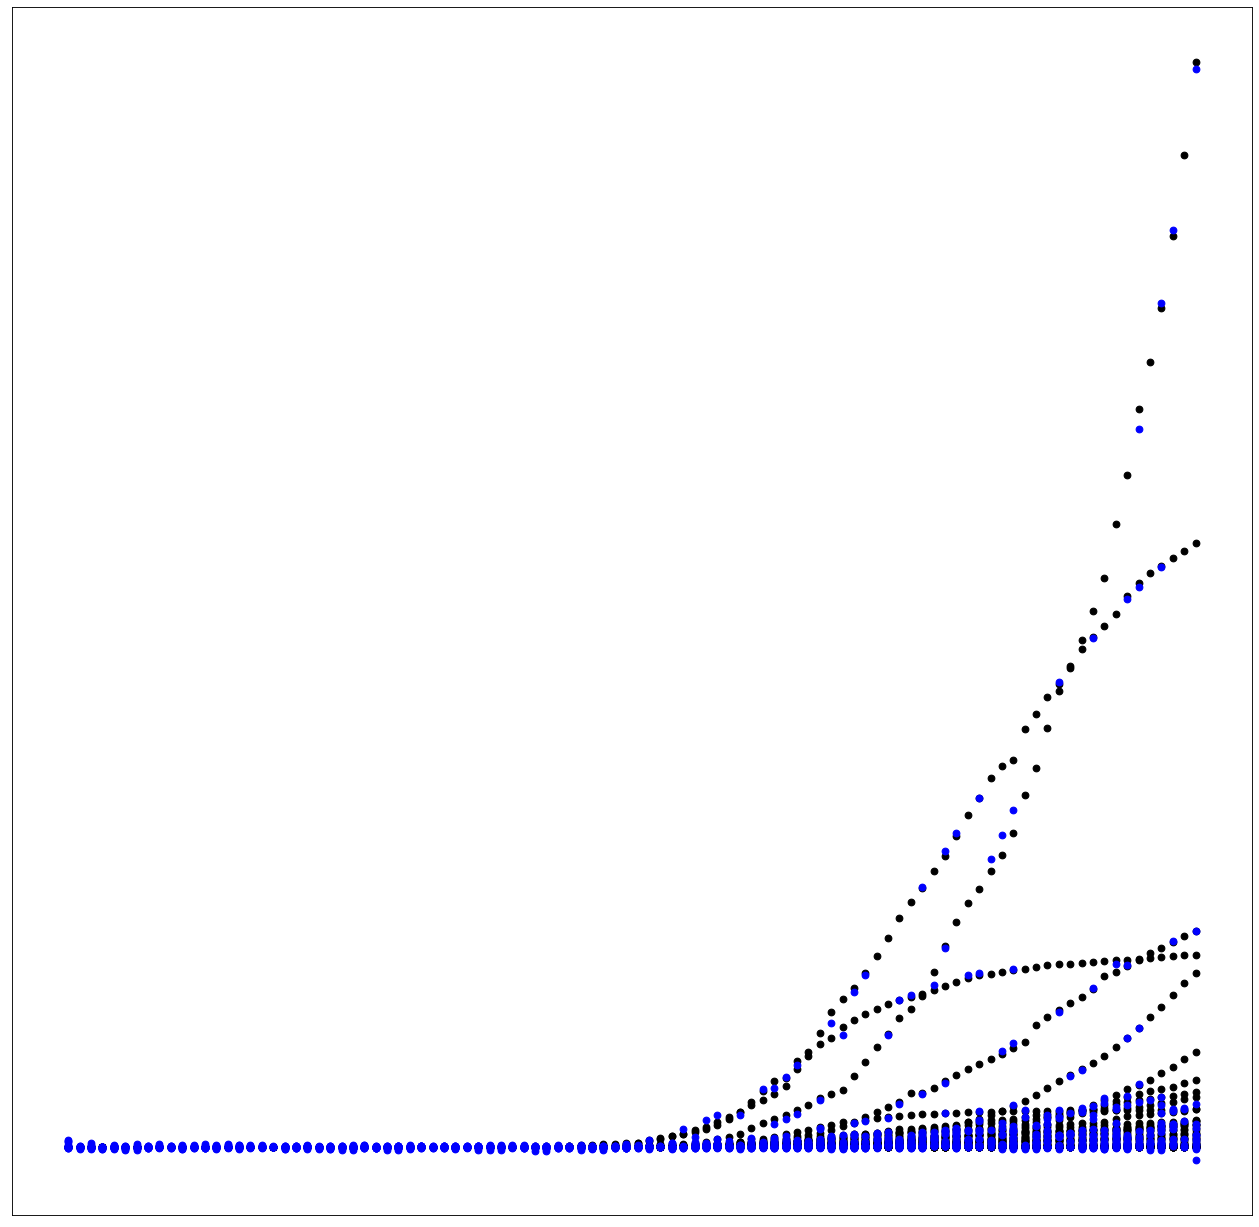

In [44]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

In the image above, black points are training and blue ones are test!

In [45]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test, y_pred))

22501.501182992826


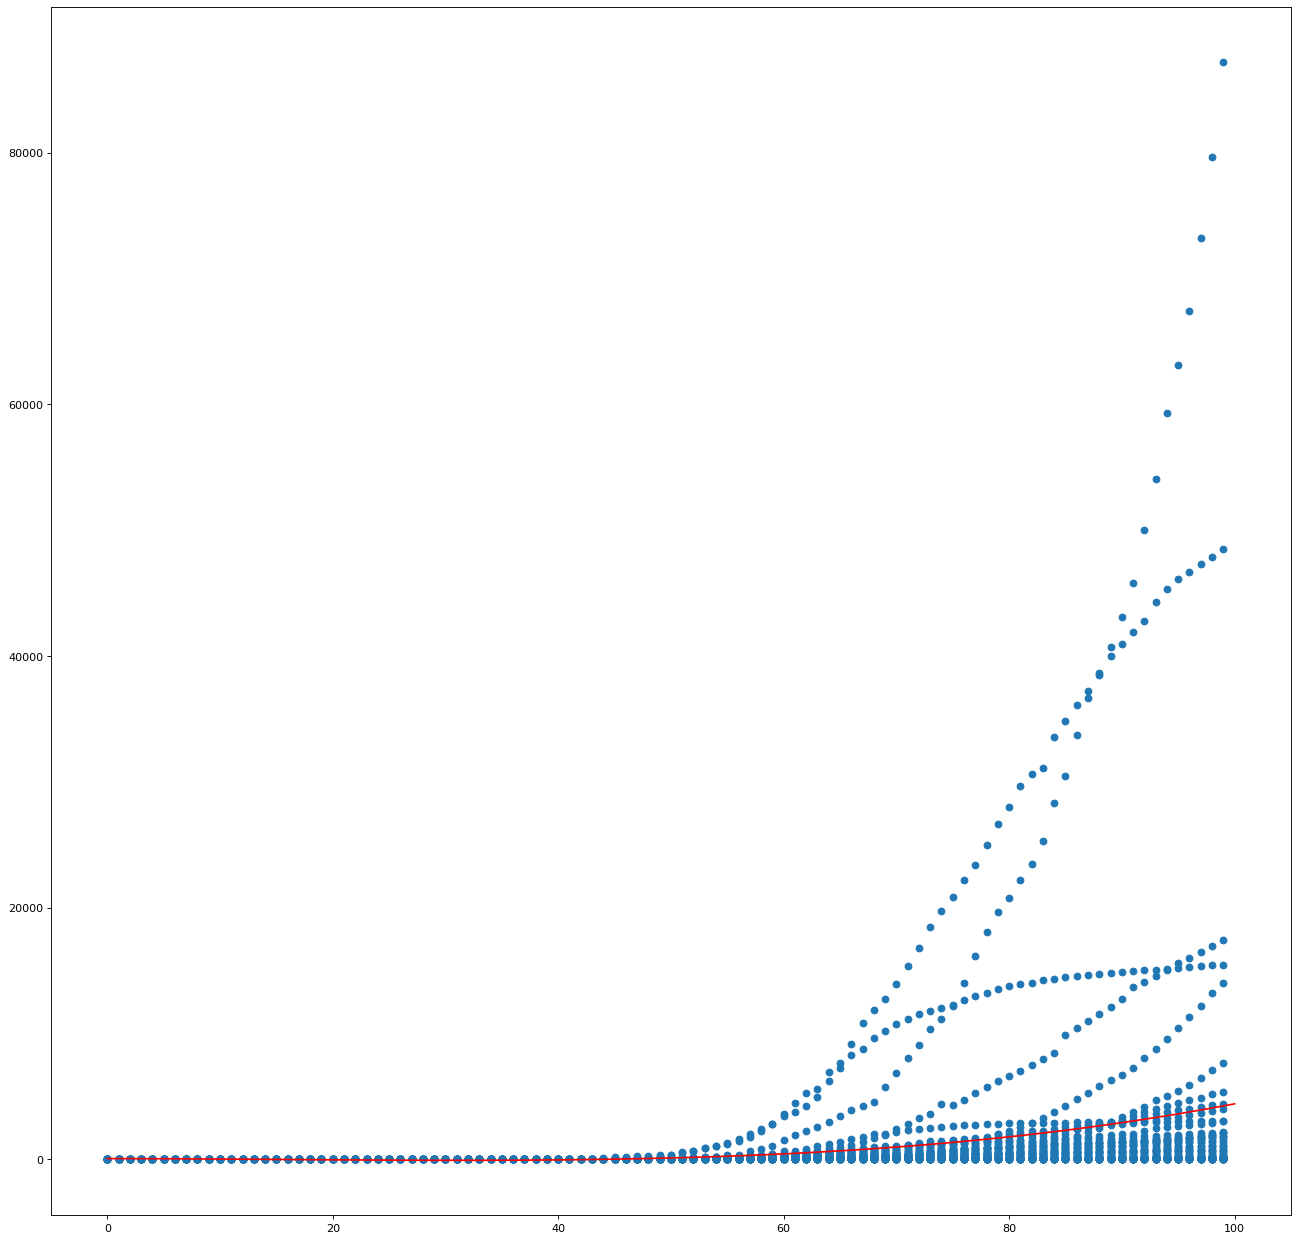

In [46]:
# 1D polynomial regression
model = np.poly1d(np.polyfit(np.transpose(X_train_1[:,2]), np.transpose(y_train[:,0]), 3))

model_x = np.linspace(0, 100, 100)
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.plot(model_x, model(model_x),'r')
plt.show()

In [21]:
#Assignment: Report the mean squared error for prediction using differnt degrers of Polynomial Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#1. Report the best model for this data

#2. Repeat for complete data (Change step 3) and report the best model



# Assignment 1

In [30]:
#Assignment #1

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_degrees = []
mse_vals = []
for i in range(3,30):
  
  poly = PolynomialFeatures(degree=i)
  # Transform both the train and test data
  X_train = poly.fit_transform(X_train_1)
  X_test = poly.fit_transform(X_test_1)
  print("New shape of test data=",np.shape(X_test))

  clf = LinearRegression()
  # Fit the model on train data only
  clf.fit(X_train, y_train)
  # print("Linear Regression Coefficients are=",clf.coef_)
  # print("constant coefficient=",clf.intercept_)

  y_pred = clf.predict(X_test)
  # next plot predictions
  # plt.figure(figsize=(20, 20), dpi=80)
  # plt.scatter(X[:,2], Y[:,0],  color='black')
  # plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
  # plt.xticks(())
  # plt.yticks(())

  # plt.show()

  from sklearn.metrics import mean_squared_error as mse
  polynomial_degrees.append(i)
  mse_vals.append(mse(y_test, y_pred))

New shape of test data= (1500, 20)
New shape of test data= (1500, 35)
New shape of test data= (1500, 56)
New shape of test data= (1500, 84)
New shape of test data= (1500, 120)
New shape of test data= (1500, 165)
New shape of test data= (1500, 220)
New shape of test data= (1500, 286)
New shape of test data= (1500, 364)
New shape of test data= (1500, 455)
New shape of test data= (1500, 560)
New shape of test data= (1500, 680)
New shape of test data= (1500, 816)
New shape of test data= (1500, 969)
New shape of test data= (1500, 1140)
New shape of test data= (1500, 1330)
New shape of test data= (1500, 1540)
New shape of test data= (1500, 1771)
New shape of test data= (1500, 2024)
New shape of test data= (1500, 2300)
New shape of test data= (1500, 2600)
New shape of test data= (1500, 2925)
New shape of test data= (1500, 3276)
New shape of test data= (1500, 3654)
New shape of test data= (1500, 4060)
New shape of test data= (1500, 4495)
New shape of test data= (1500, 4960)


In [31]:
polynomial_degrees

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [32]:
mse_vals

[20560548.002745174,
 18150800.781314142,
 14193417.434568288,
 9116090.38274086,
 4553747.836499233,
 1647485.2115973923,
 852998.2341865832,
 292411.1100162412,
 165820.39517135787,
 59911.08382956289,
 42823.76465792344,
 48262.20936478409,
 28638.23167982166,
 53084.888326286135,
 147700.7860421502,
 32719.992937412386,
 63681.47360981373,
 26729.058065548877,
 349950.08880734676,
 22501.501182992826,
 34929.47441706763,
 97816.57770476092,
 60737.26552235832,
 73631.27621647748,
 1311600.8364136056,
 836658.5754937717,
 4590416.3280961]

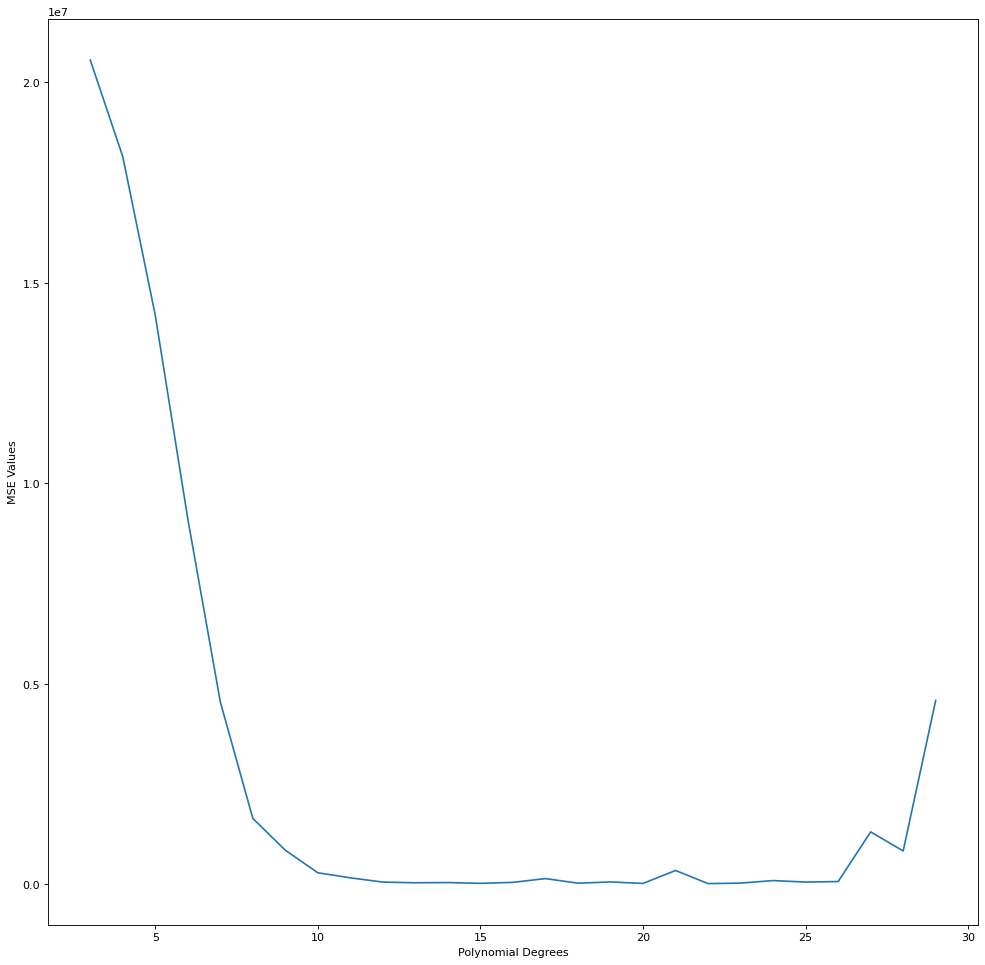

In [34]:

plt.figure(figsize=(15,15), dpi=80)
plt.plot(polynomial_degrees, mse_vals)
plt.xlabel('Polynomial Degrees')
plt.ylabel('MSE Values')
plt.show()

In [42]:
print('Best model for polynomial degrees of ', polynomial_degrees[np.argmin(mse_vals)])

Best model for polynomial degrees of  22


## Solution is polynomial degrees of  22

# Assignment 2

In [57]:
data_new=data.iloc[:,4:]
print(data_new.shape)

(266, 221)


In [58]:
import matplotlib.pyplot as plt
data_row=data_new.sum(axis=0)
print(data_row)
days=range(0,data_row.shape[0])
print(days)
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
print(data_new.shape[0])
print(days_mat.shape)

1/22/20         555
1/23/20         654
1/24/20         941
1/25/20        1434
1/26/20        2118
             ...   
8/25/20    23885837
8/26/20    24173588
8/27/20    24452689
8/28/20    24734448
8/29/20    24996456
Length: 221, dtype: int64
range(0, 221)
266
(266, 221)


In [59]:
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new=np.array(data_new)
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1)))

(58786, 3)


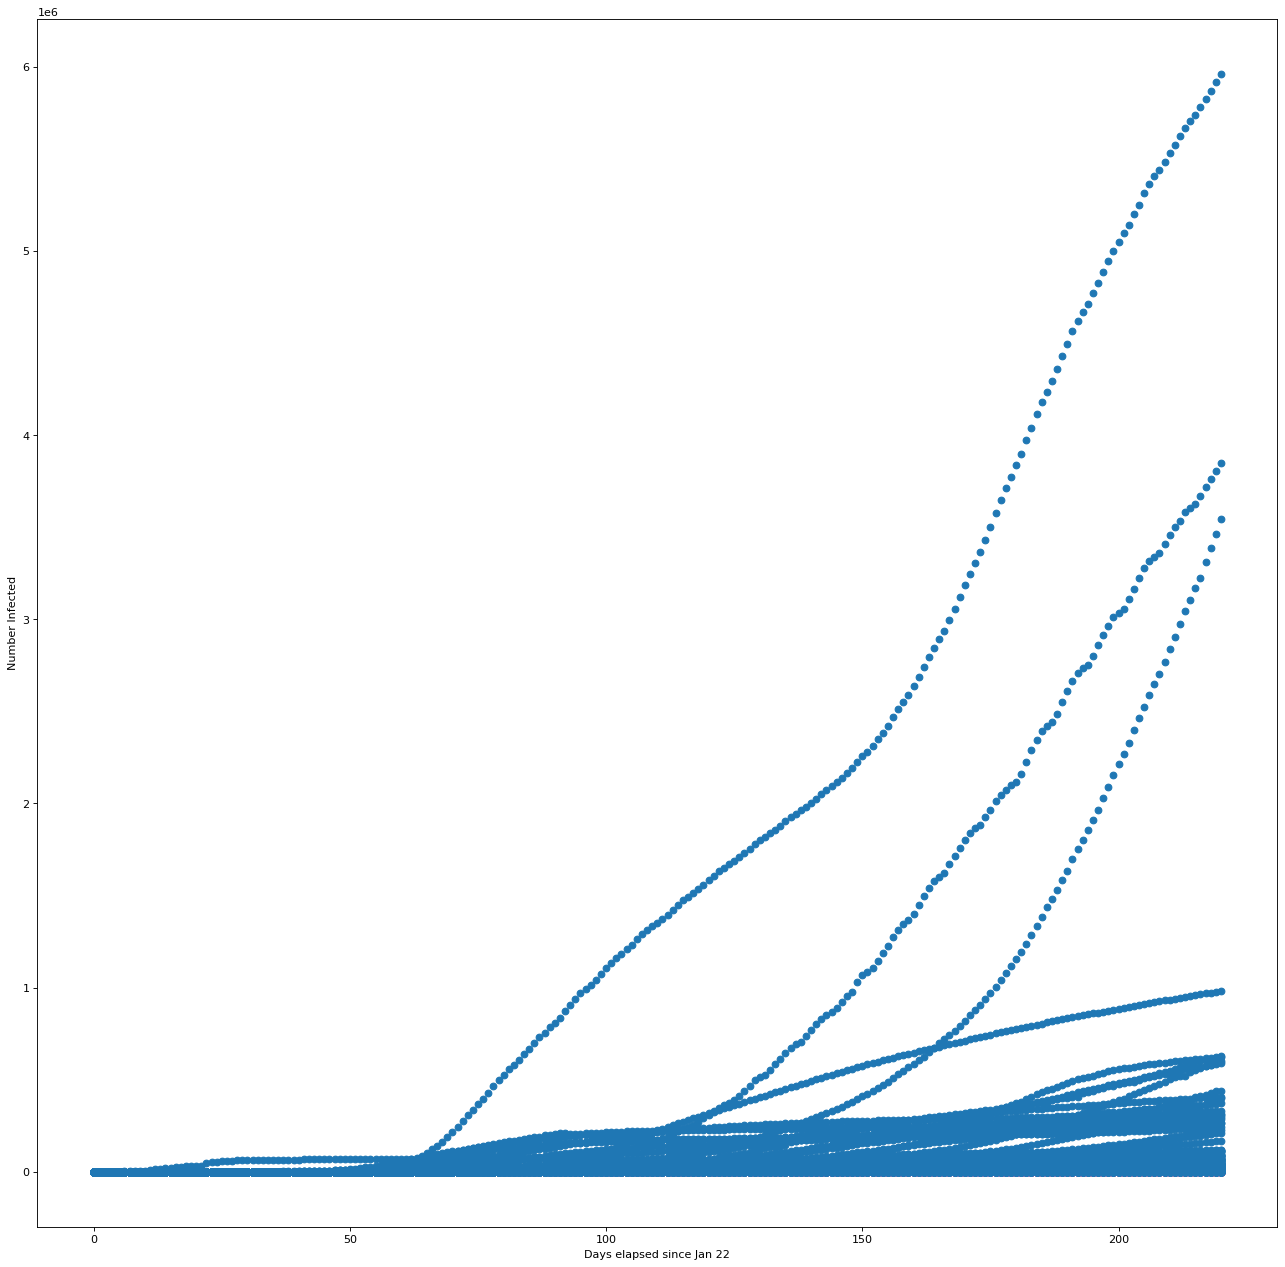

In [60]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
print(np.shape(X))

In [61]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [62]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_degrees_full = []
mse_vals_full = []
for i in range(3,25):
  
  poly = PolynomialFeatures(degree=i)
  # Transform both the train and test data
  X_train = poly.fit_transform(X_train_1)
  X_test = poly.fit_transform(X_test_1)
  print("New shape of test data=",np.shape(X_test))

  clf = LinearRegression()
  # Fit the model on train data only
  clf.fit(X_train, y_train)
  # print("Linear Regression Coefficients are=",clf.coef_)
  # print("constant coefficient=",clf.intercept_)

  y_pred = clf.predict(X_test)


  from sklearn.metrics import mean_squared_error as mse
  polynomial_degrees_full.append(i)
  mse_vals_full.append(mse(y_test, y_pred))

New shape of test data= (17636, 20)
New shape of test data= (17636, 35)
New shape of test data= (17636, 56)
New shape of test data= (17636, 84)
New shape of test data= (17636, 120)
New shape of test data= (17636, 165)
New shape of test data= (17636, 220)
New shape of test data= (17636, 286)
New shape of test data= (17636, 364)
New shape of test data= (17636, 455)
New shape of test data= (17636, 560)
New shape of test data= (17636, 680)
New shape of test data= (17636, 816)
New shape of test data= (17636, 969)
New shape of test data= (17636, 1140)
New shape of test data= (17636, 1330)
New shape of test data= (17636, 1540)
New shape of test data= (17636, 1771)
New shape of test data= (17636, 2024)
New shape of test data= (17636, 2300)
New shape of test data= (17636, 2600)
New shape of test data= (17636, 2925)


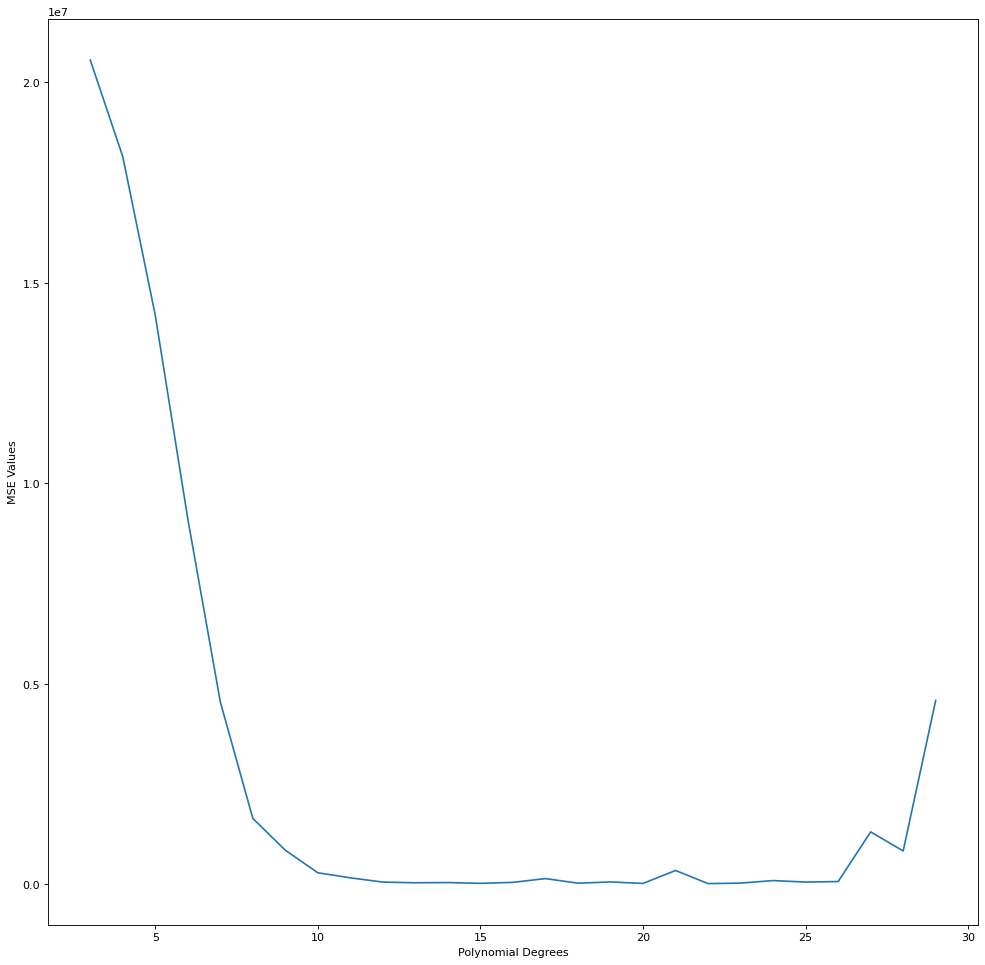

In [63]:
plt.figure(figsize=(15,15), dpi=80)
plt.plot(polynomial_degrees, mse_vals)
plt.xlabel('Polynomial Degrees')
plt.ylabel('MSE Values')
plt.show()

In [64]:
print('Best model based on polynomial degrees of {} for full dataset'.format(polynomial_degrees[np.argmin(mse_vals)]))

Best model based on polynomial degrees of 22 for full dataset


In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=22)
# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (17636, 2300)
Linear Regression Coefficients are= [[ 1.70925646e-33  2.49769115e-33 -1.78578896e-34 ...  9.75873180e-43
  -3.06283441e-44  1.16544447e-42]]
constant coefficient= [5587.94012476]


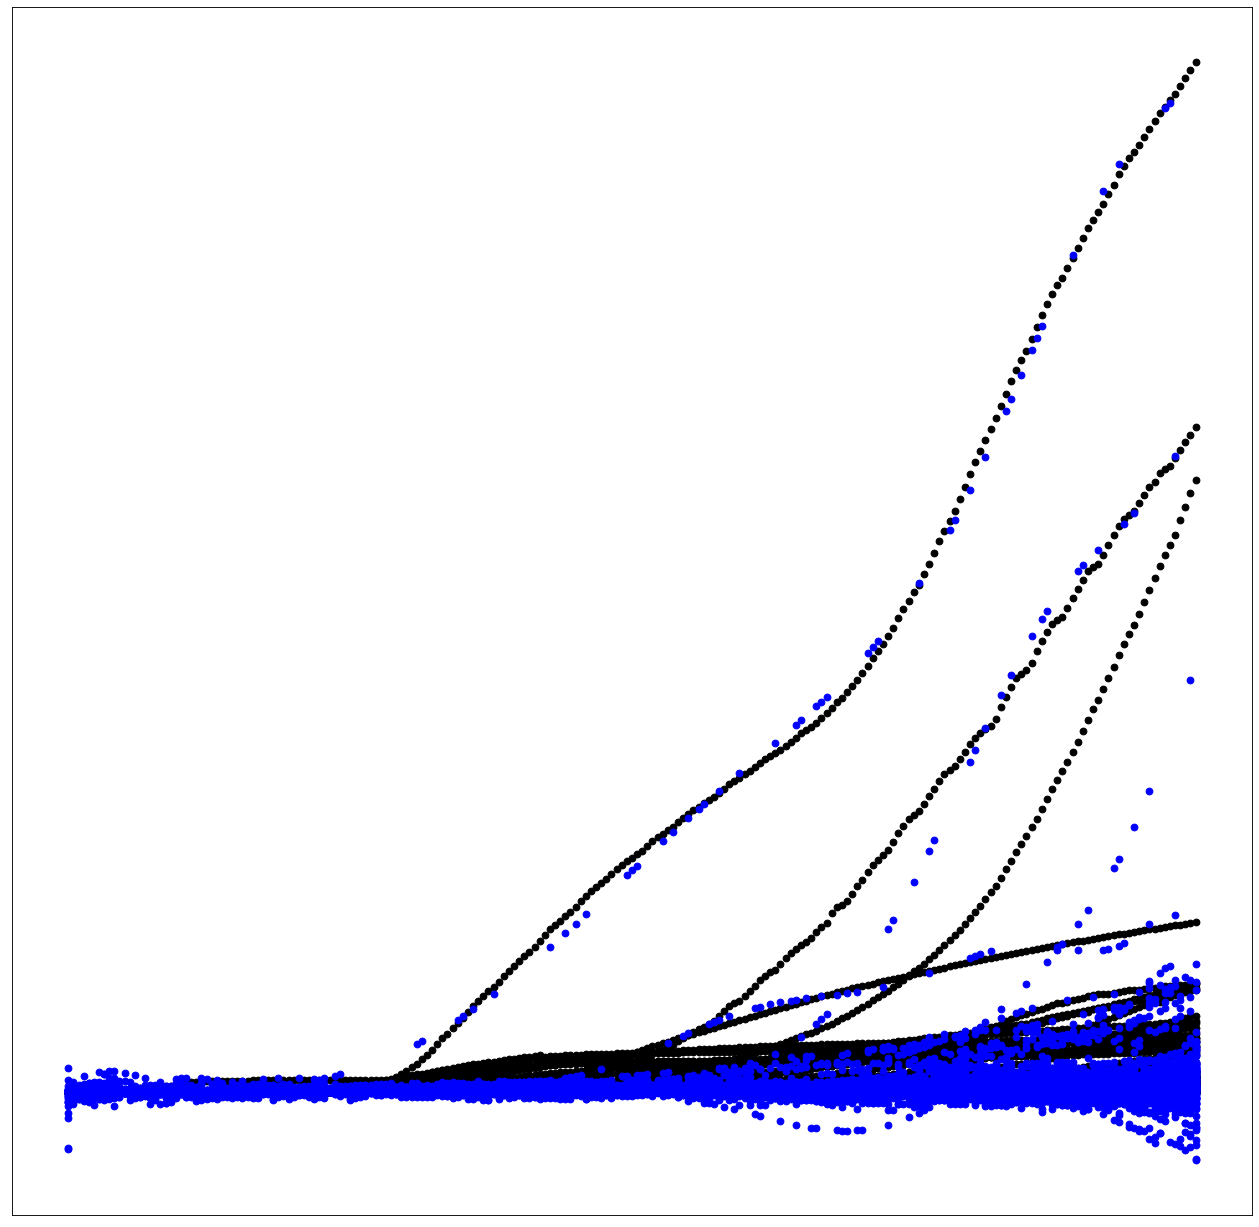

In [66]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

## Solution is polynomial degrees of  22 for full dataset as well